# important links


## list:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels?sortBy=voteCount&group=everyone&pageSize=20&language=Python&competitionId=5407


## xgboost:
https://www.kaggle.com/dansbecker/xgboost

https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5



## regration + graph :
https://www.kaggle.com/janiobachmann/predicting-house-prices-regression-techniques


## Selecting and Filtering Data
https://www.kaggle.com/dansbecker/selecting-and-filtering-in-pandas

## Handling Missing Values
https://www.kaggle.com/dansbecker/handling-missing-values



## why use conditional probability coding
https://medium.com/airbnb-engineering/designing-machine-learning-models-7d0048249e69

## one hot encoding
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223

## class example
https://colab.research.google.com/drive/1MExQ52bvHSPaUrGe8RvHZifvE6K6a0qh?fbclid=IwAR2EUWi4q6_q0mFbXQwGh4GNgB2Ex_WpP3K0L12182PdzszWSsEfzHf0REo#forceEdit=true&offline=true&sandboxMode=true&scrollTo=-Rh3-Vt9Nev9

# Imports:

In [41]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [42]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.preprocessing import normalize,MinMaxScaler
# %matplotlib widget

# Data Pre-processing

### Load Data

In [43]:
train = pd.read_csv('train.csv')#.select_dtypes(exclude=['object'])
test = pd.read_csv('test.csv')#.select_dtypes(exclude=['object'])

#look into datatypes of the file
print("data types count")
train.dtypes.groupby(train.dtypes).count()


data types count


int64      35
float64     3
object     43
dtype: int64

In [44]:
#selecting target
train_target = train.SalePrice
#the last column is the SalePrice coloumn so removing it from the list
predictor_cols = train.drop(train.columns[-1],axis=1)
# droping id
predictor_cols = predictor_cols.drop('Id',axis=1)
predictor_cols_test = test.drop('Id',axis=1)


### Looking into data

In [45]:
print('description of data')
train.describe()

description of data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Removing missing data

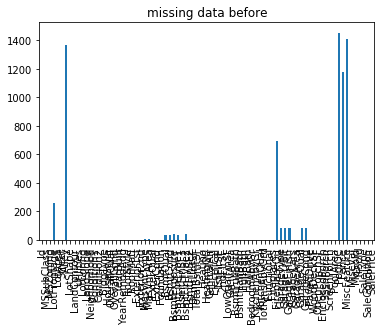

In [46]:
missing_data_col = train.isnull().sum()
missing_data_col.plot.bar(title = 'missing data before')
total_row = train.index.size
missing_data_list = missing_data_col[missing_data_col > total_row*.50].index
train = train.drop(missing_data_list,1)
# removing form kaggle test data also
test = test.drop(missing_data_list,1)

### One hot encoding
To encode categorical integer features as a one-hot numeric array we are using one hot encoding. This will transform each value of catagories into a features and make those a column value of dataframe. Finally put binary values in the rows of those column.

In this section at first we merge train and test data (variable name predictor_cols and predictor_cols_test). We did it because there is some fetures in train data which is missing in test data again same thing can happen for test data too. 

In [47]:
def OneHotEncoding(all_data):
    enc = OneHotEncoder()
    
    all_data = enc.fit_transform(all_data)
    # all_data is no in scipy.sparse.csr.csr_matrix format converting it to 2d-numpy array
    all_data = all_data.toarray()
    all_data = pd.DataFrame(all_data, columns=enc.get_feature_names())
    return all_data



### Imputing missing data
    We are using simpleimputer and it uses mean by default. It will just replace those empty places with mean values.
    In this section we are impute missing coloumn where the missing data amount is less than 50%. 

In [48]:
def imputation(all_data):
    imputer_numb_col = SimpleImputer(strategy="most_frequent" , missing_values=np.nan )
    imputer_obj_col = SimpleImputer(strategy="most_frequent" , missing_values=np.nan )
    #excluding all object dtype column
    num_col = all_data.select_dtypes(exclude= ['object'])
    #excluding all number dtype column
    obj_col = all_data.select_dtypes(include=['object'])
    
    """ 
    fit_transform turns a df to numpy array so keeping the column name would be helpful for returning to df format
    """
    
    #imputing number part of df
    column_names = num_col.columns.values
    num_col = imputer_numb_col.fit_transform(num_col)
    # putting imputed values in the place of missing values of original detaframe 
    num_col = pd.DataFrame(num_col, columns = column_names)
    
    # imputing object part of df
    column_names = obj_col.columns.values
    obj_col = imputer_obj_col.fit_transform(obj_col)   
    obj_col = pd.DataFrame(obj_col,columns = column_names)
    
    """performing one hot encoding on obj_col dataframe"""
    obj_col = OneHotEncoding(obj_col)
    
    
    #combinin numb and obje part to all_data
    all_data = num_col.combine_first(obj_col)
    return all_data



In [49]:

"""One hot encoding is going to perform inside imputation function so we need """

# getting last index of training data
lenth_predictor_cols = len(predictor_cols)
#for performing one hot encoding we combine all data
all_data = predictor_cols.append(predictor_cols_test, ignore_index=True)

all_data = imputation(all_data)



### after imputation graphs

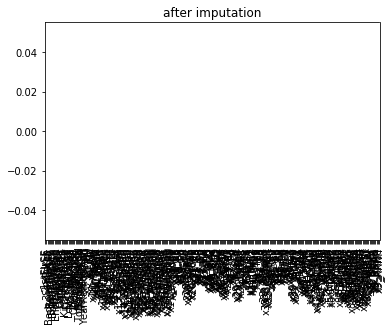

In [50]:
pd.DataFrame(all_data).isnull().sum().plot.bar(title = "after imputation")

## Skewness Check

### skewness train set

In [51]:
# from scipy.stats import kurtosis, skew

# skewness = all_data.skew(axis=0 , skipna =True)
# pd.DataFrame(skewness).plot.bar(title = "skewness")

# print('target skew: ',train_target.skew())

In [52]:
# skewness= abs(skewness)>0.5
# skewed_col = skewness.index[skewness == True]


# #x5_AllPub
# col_name = all_data.columns
# nor = normalize(all_data)
# all_data = pd.DataFrame(nor,columns=col_name)

# all_data[skewed_col] = np.log1p(all_data[skewed_col])


In [53]:
# skewness = all_data.skew(axis=0 , skipna =True)
# pd.DataFrame(skewness).plot.bar(title = "skewness")

### Split Data for training and testing

In [54]:
# seperate the dataset again after performing one hot encoding
# nd array works diffrently than pandas df.loc[] 
predictor_cols = all_data[:lenth_predictor_cols]
predictor_cols_test = all_data[lenth_predictor_cols:]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(predictor_cols, 
                                                    train_target,
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Model selection

## Model selection

### Linear Regression

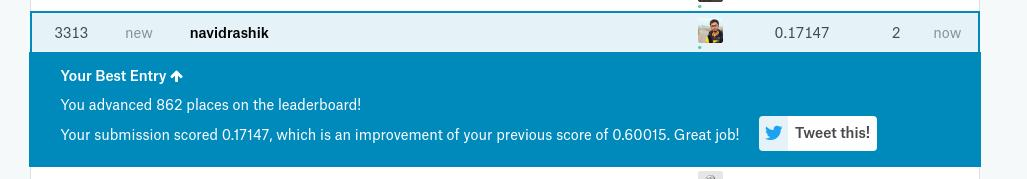

In [56]:
my_model = LinearRegression()
Image("regression.jpg")


In [57]:
from sklearn import svm
my_model = svm.SVR(C=1.0,epsilon=0.01,gamma='auto')

In [58]:
from sklearn.naive_bayes import GaussianNB
my_model = GaussianNB()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=3)

### Random Forest Regressor

In [60]:
my_model = RandomForestRegressor()

### DecisionTree

In [61]:
from sklearn.tree import DecisionTreeRegressor
my_model = DecisionTreeRegressor()

### Xgboost 

* for 2000, 0.15 =>
mean absolute error:  14802.790788206335
accuracy score:  0.9184459671731471

* for 1000, 0.15 =>
mean absolute error:  14738.404430650686
accuracy score:  0.9185264791078522

* for 500, 0.15 =>
mean absolute error:  14709.338639768835
accuracy score:  0.918560790678001
* for 500, 0.05 =>
mean absolute error:  13994.730268086472
accuracy score:  0.9276053252581928
* for 1500, 0.05 =>
mean absolute error:  13527.634270654966
accuracy score:  0.9320158574642144

* for 1000, .05 =>
mean absolute error:  13607.276487585616
accuracy score:  0.932101661947708

* for 3000, .05 =>
mean absolute error:  13605.092010916096
accuracy score:  0.9322736091885926

In [22]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)


Image("xgboost.jpg")

## Model fit on training set

In [23]:
# my_model.fit(X_train, y_train)
# prediction = my_model.predict(X_test)

## Model fit for test set

# ANN

In [35]:

# Parameters
learning_rate = 0.1
# num_steps = 500

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

In [36]:

weights = {
    'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
    'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
    'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
    'out': tf.Variable(tf.random_normal([hidden_3, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_1])),
    'b2': tf.Variable(tf.random_normal([hidden_2])),
    'b3': tf.Variable(tf.random_normal([hidden_3])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

In [37]:
# Model Design

def ann_model(X_val):
  # Hidden layers
  layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
  layer_3 = tf.nn.relu(layer_3)
  
  # Output layer
  layer_out = tf.add(tf.matmul(layer_3, weights['out']), biases['out'])
  
  return layer_out

In [38]:


# Model Construct
model = ann_model(X_tf)

# Mean Squared Error cost function
cost = tf.reduce_mean(tf.square(y_tf - model))


# Adam optimizer will update weights and biases after each step
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model (with test logits, for dropout to be disabled)
# correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(y_tf, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize variables 
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

In [39]:

with tf.Session() as sess:
    #running initializer
    sess.run(init)
    for i in range(7000):
        sess.run(optimizer, feed_dict={X_tf:X_train, y_tf:y_train})
        if (i+1)%100 == 0:
            print("batch no : ",i+1)
            
    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)
    
    pred = sess.run(model, feed_dict={X_tf: X_test})
    prediction = pred.squeeze()
#     print()
#     print(pred)
    
#   pred = np.expm1(pred)
#   print(pred)

print('mean absolute error: ',mean_absolute_error(y_test.values, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )


batch no :  100
batch no :  200
batch no :  300
batch no :  400
batch no :  500
batch no :  600
batch no :  700
batch no :  800
batch no :  900
batch no :  1000
batch no :  1100
batch no :  1200
batch no :  1300
batch no :  1400
batch no :  1500
batch no :  1600
batch no :  1700
batch no :  1800
batch no :  1900
batch no :  2000
batch no :  2100
batch no :  2200
batch no :  2300
batch no :  2400
batch no :  2500
batch no :  2600
batch no :  2700
batch no :  2800
batch no :  2900
batch no :  3000
batch no :  3100
batch no :  3200
batch no :  3300
batch no :  3400
batch no :  3500
batch no :  3600
batch no :  3700
batch no :  3800
batch no :  3900
batch no :  4000
batch no :  4100
batch no :  4200
batch no :  4300
batch no :  4400
batch no :  4500
batch no :  4600
batch no :  4700
batch no :  4800
batch no :  4900
batch no :  5000
batch no :  5100
batch no :  5200
batch no :  5300
batch no :  5400
batch no :  5500
batch no :  5600
batch no :  5700
batch no :  5800
batch no :  5900
batch 

In [40]:
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "/tmp/model.ckpt")
    print("Model restored.")
    
    # Check the values of the variables
    pred =  sess.run(model, feed_dict={X_tf: predictor_cols_test})
    prediction = pred.squeeze()
    print(prediction)

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored.
[158006.39 153905.58 158202.62 ... 156353.73 160101.66 158691.17]


In [30]:
# with tf.Session() as sess:

#     # Run the initializer
#     sess.run(init)

#     for step in range(num_steps):
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         # Run optimization op (backprop)
#         sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))

#     print("Optimization Finished!")

#     # Calculate accuracy for MNIST test images
#     print("Testing Accuracy:", \
#         sess.run(accuracy, feed_dict={X: mnist.test.images,
#                                       Y: mnist.test.labels}))

In [31]:
# prediction = my_model.predict(X_test)


In [32]:
# prediction_test = my_model.predict(predictor_cols_test)

# Acuracy Score

In [33]:
# print('mean absolute error: ',mean_absolute_error(y_test, prediction))
# print('accuracy score: ', my_model.score(X_test,y_test))

print('mean absolute error: ',mean_absolute_error(y_test, prediction))
print('accuracy score: ', accuracy_score(X_test,y_test))


ValueError: Found input variables with inconsistent numbers of samples: [292, 1459]

In addition to your training data, there will be test data. This is frequently stored in a file with the title `test.csv`. This data won't include a column with your target (y), because that is what we'll have to predict and submit.  Here is sample code to do that. 

# Prepare Submission File

In [34]:

my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': prediction})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)